In [1]:
%matplotlib inline

# PennyLane
![image](header-tall.png)

PennyLane is a cross-platform Python library for differentiable programming of quantum computers. Train a quantum computer the same way as a neural network.
 
It has the following features:

* Follow the gradient. Built-in automatic differentiation of quantum circuits.
* Best of both worlds. Support for hybrid quantum and classical models; connect quantum hardware with PyTorch, TensorFlow, and NumPy.
* Just in time compilation. Compile your entire hybrid workflow, with support for adaptive circuits, real-time measurement feedback, unbounded loops, and more. See Catalyst for more details.
* Batteries included. Provides optimization and machine learning tools.
* Device-independent. The same quantum circuit model can be run on different backends. Install plugins to access even more devices, including Strawberry Fields, Amazon Braket, IBM Q, Google Cirq, Rigetti Forest, Microsoft QDK, and ProjectQ.

In this lecture, I'll ask you to install PennyLane, and PennyLane-Qiskit plugin. 

# Graph Machine Learning 

A graph is defined as a set of *nodes* along with a set of **edges**, which represent connections between nodes. Information can be encoded into graphs by assigning numbers to nodes and edges, which we call **weights**. It is usually convenient to think of a graph visually:

![image](graph4.png)

In recent years, the concept of a [graph neural network](https://arxiv.org/abs/1812.08434) (GNN) has been receiving a lot of attention from the machine learning community. A GNN seeks to learn a representation (a mapping of data into a low-dimensional vector space) of a given graph with feature vectors assigned to nodes and edges. Each of the vectors in the learned representation preserves not only the features, but also the overall topology of the graph, i.e., which nodes are connected by edges. The quantum graph neural network attempts to do something similar, but for features that are quantum-mechanical; for instance, a collection of quantum states.

Though what kind of problems revolve around graphs? Imagine these tasks:
* Given the traffic data across American cities, what is the predicted traffic in New York City tomorrow (node classification)?
* Knowing the network of LinkedIn connections, how likely is it that Henry has already met Terry (link prediction)?
* Given a molecule, what is its’ probability of being toxic (global graph level prediction)?


![image](GNN_tasks.png)

The objective of graph neural network is to predict certain properties of given graph-structured data. For the sake of exposition, we say that all graph-based tasks fall under the following 3 buckets (see above tasks for corresponding examples):
1. Node-level — predicting some property for each node in a graph
2. Edge-level — predicting the property or presence of edges in a graph
3. Graph-level — predicting a property for a whole graph


## Challenges with graph data

Neural networks don’t naturally speak the language of graphs.  The main problem is that the graphs are such flexible mathematical representations. So in many problems, the graphs which you process vary by structure. An example case is where the various graphs we train on contain a different number of nodes and edges — like molecules. Unlike the previous cases when architecting conventional neural networks since the data structure remains consistent among images, audio, or text.

But say we assume that each graph contains a uniform number of nodes, and define a node feature matrix 


# Graph Machine Learning meets High Energy Physics

Each collision event in the Large Hadron Collider spawns tens of thousands of particles flying outwards. When these particles pass through the layered detectors, they create signals in the detector called hits. We can expect around 80,000 detector hits from each collision event.

![image](CERN_jet.png)

Right now, computational algorithms for particle reconstruction manage at the current rate of collisions but they suffer from higher collision rates as they scale worse than quadratically (ex. $O(n^6)$ ). However, CERN is currently upgrading the LHC to have a higher number of particles in each beam (high luminosity) meaning that each collision will spawn even more particles and set off more hits. Scientists realize that the current algorithms will become unwieldy to utilize with the upcoming High Luminosity LHC experiments. ** So, the efficient reconstruction of particle trajectories is one of the most important challenges in the HL-LHC upgrade. an intensive problem.** 


## Graph problem formulation and motivation for graph neural networks

A simple reframing makes it clear how this problem lives squarely within graph theory land.

Think of each detector hit as a node. Then each connection between adjacent layers hits as candidate edges. From here the particle reconstruction problem can be reformulated from a graph perspective as follows.

![image](QGNN_particle.png)

see: Tüysüz, C., Rieger, C., Novotny, K. et al. Hybrid quantum classical graph neural networks for particle track reconstruction. Quantum Mach. Intell. 3, 29 (2021). https://doi.org/10.1007/s42484-021-00055-9




# The Quantum Graph Recurrent Neural Network


This demonstration investigates quantum graph recurrent neural networks (QGRNN), which are the quantum analogue of a classical graph recurrent neural network, and a subclass of the more general quantum graph neural network ansatz. Both the QGNN and QGRNN were introduced in this paper [2](https://arxiv.org/abs/1909.12264). 

Consider the class of qubit Hamiltonians that are *quadratic*, meaning that the terms of the Hamiltonian represent either interactions between two qubits, or the energy of individual qubits. This class of Hamiltonians is naturally described by graphs, with second-order terms between qubits corresponding to weighted edges between nodes, and first-order terms corresponding to node weights. A well known example of a quadratic Hamiltonian is the transverse-field Ising model, which is defined as 

$$\hat{H}_{\text{Ising}}(\boldsymbol\theta) \ = \ \displaystyle\sum_{(i, j) \in E}
\theta_{ij}^{(1)} Z_{i} Z_{j} \ + \ \displaystyle\sum_{i} \theta_{i}^{(2)} Z_{i} \ + \
\displaystyle\sum_{i} X_{i},$$

where $\boldsymbol\theta \ = \ \{\theta^{(1)}, \ \theta^{(2)}\}$. In this Hamiltonian, the set $E$ that determines which pairs of qubits have $ZZ$ interactions can be represented by the set of edges for some graph. With the qubits as nodes, this graph is called the *interaction graph*. The $\theta^{(1)}$ parameters correspond to the edge weights and the $\theta^{(2)}$ parameters correspond to weights on the nodes.


This result implies that we can think about *quantum circuits* with graph-theoretic properties. Recall that the time-evolution operator with respect to some Hamiltonian $H$ is defined as:

$$U \ = \ e^{-it H}.$$

Thus, we have a clean way of taking quadratic Hamiltonians and turning them into unitaries (quantum circuits) that preserve the same correspondance to a graph. In the case of the Ising Hamiltonian, we have:

$$U_{\text{Ising}} \ = \ e^{-it \hat{H}_{\text{Ising}} (\boldsymbol\theta)} \ = \ \exp \Big[ -it
\Big( \displaystyle\sum_{(i, j) \in E} \theta_{ij}^{(1)} Z_{i} Z_{j} \ + \
\displaystyle\sum_{i} \theta_{i}^{(2)} Z_{i} \ + \ \displaystyle\sum_{i} X_{i} \Big) \Big]$$

In general, this kind of unitary is very difficult to implement on a quantum computer. However, we can approximate it using the [Trotter-Suzuki decomposition](https://en.wikipedia.org/wiki/Time-evolving_block_decimation#The_Suzuki-Trotter_expansion):

$$\exp \Big[ -it \Big( \displaystyle\sum_{(i, j) \in E} \theta_{ij}^{(1)} Z_{i} Z_{j} \ + \
\displaystyle\sum_{i} \theta_{i}^{(2)} Z_{i} \ + \ \displaystyle\sum_{i} X_{i} \Big) \Big]
\ \approx \ \displaystyle\prod_{k \ = \ 1}^{t / \Delta} \Bigg[ \displaystyle\prod_{j \ = \
1}^{Q} e^{-i \Delta \hat{H}_{\text{Ising}}^{j}(\boldsymbol\theta)} \Bigg]$$

where $\hat{H}_{\text{Ising}}^{j}(\boldsymbol\theta)$ is the $j$-th term of the Ising Hamiltonian and $\Delta$ is some small number.

This circuit is a specific instance of the **Quantum Graph Recurrent Neural Network**, which in general is defined as a variational ansatz of the form

$$U_{H}(\boldsymbol\mu, \ \boldsymbol\gamma) \ = \ \displaystyle\prod_{i \ = \ 1}^{P} \Bigg[
\displaystyle\prod_{j \ = \ 1}^{Q} e^{-i \gamma_j H^{j}(\boldsymbol\mu)} \Bigg],$$

for some parametrized quadratic Hamiltonian, $H(\boldsymbol\mu)$.


Using the QGRNN
===============


Since the QGRNN ansatz is equivalent to the approximate time evolution of some quadratic Hamiltonian, we can use it to learn the dynamics of a quantum system.

Continuing with the Ising model example, let\'s imagine we have some system governed by $\hat{H}_{\text{Ising}}(\boldsymbol\alpha)$ for an unknown set of target parameters, $\boldsymbol\alpha$ and an unknown interaction graph $G$. Let\'s also suppose we have access to copies of some low-energy, non-ground state of the target Hamiltonian, $|\psi_0\rangle$. In addition, we have access to a collection of time-evolved states, $\{ |\psi(t_1)\rangle, \ |\psi(t_2)\rangle, \ ..., \ |\psi(t_N)\rangle \}$, defined by:

$$|\psi(t_k)\rangle \ = \ e^{-i t_k \hat{H}_{\text{Ising}}(\boldsymbol\alpha)} |\psi_0\rangle.$$

We call the low-energy states and the collection of time-evolved states *quantum data*. From here, we randomly pick a number of time-evolved states from our collection. For any state that we choose, which is evolved to some time $t_k$, we compare it to 

$$U_{\hat{H}_{\text{Ising}}}(\boldsymbol\mu, \ \Delta) |\psi_0\rangle \ \approx \ e^{-i t_k
\hat{H}_{\text{Ising}}(\boldsymbol\mu)} |\psi_0\rangle.$$

This is done by feeding one of the copies of $|\psi_0\rangle$ into a quantum circuit with the QGRNN ansatz, with some guessed set of parameters $\boldsymbol\mu$ and a guessed interaction graph, $G'$. We then use a classical optimizer to maximize the average \"similarity\" between the time-evolved states and the states prepared with the QGRNN.

As the QGRNN states becomes more similar to each time-evolved state for each sampled time, it follows that $\boldsymbol\mu \ \rightarrow \ \boldsymbol\alpha$ and we are able to learn the unknown parameters of the Hamiltonian.

![A visual representation of one execution of the QGRNN for one piece of quantum data.](qgrnn3.png){.align-center width="90.0%"}


Learning an Ising Model with the QGRNN
======================================


We now attempt to use the QGRNN to learn the parameters corresponding to an arbitrary transverse-field Ising model Hamiltonian.


Getting Started
===============


We begin by importing the necessary dependencies:


In [2]:
import pennylane as qml
from matplotlib import pyplot as plt
from pennylane import numpy as np
import scipy
import networkx as nx
import copy

We also define some fixed values that are used throughout the simulation.


In [3]:
qubit_number = 4
qubits = range(qubit_number)

In this simulation, we don\'t have quantum data readily available to pass into the QGRNN, so we have to generate it ourselves. To do this, we must have knowledge of the target interaction graph and the target Hamiltonian.

Let us use the following cyclic graph as the target interaction graph of the Ising Hamiltonian:


Edges: [(0, 1), (0, 3), (1, 2), (2, 3)]


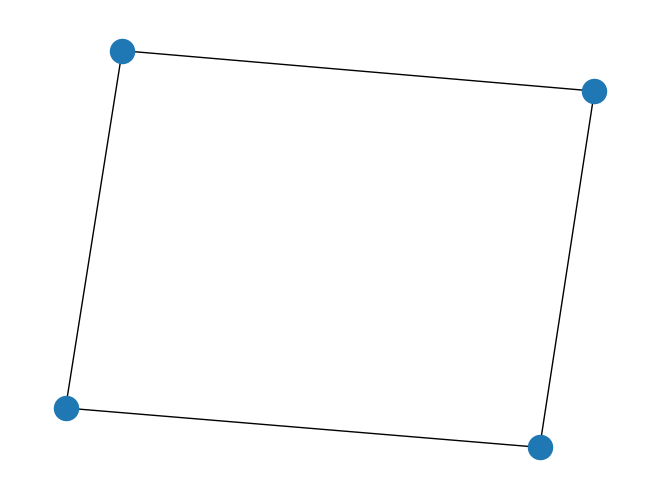

In [4]:
ising_graph = nx.cycle_graph(qubit_number)

print(f"Edges: {ising_graph.edges}")
nx.draw(ising_graph)

We can then initialize the "unknown" target parameters that describe the target Hamiltonian, $\boldsymbol\alpha \ = \ \{\alpha^{(1)}, \ \alpha^{(2)}\}$. Recall from the introduction that we have defined our parametrized Ising Hamiltonian to be of the form:

$$\hat{H}_{\text{Ising}}(\boldsymbol\theta) \ = \ \displaystyle\sum_{(i, j) \in E}
\theta_{ij}^{(1)} Z_{i} Z_{j} \ + \ \displaystyle\sum_{i} \theta_{i}^{(2)} Z_{i} \ + \
\displaystyle\sum_{i} X_{i},$$

where $E$ is the set of edges in the interaction graph, and $X_i$ and $Z_i$ are the Pauli-X and Pauli-Z on the $i$-th qubit.

For this tutorial, we choose the target parameters by sampling from a uniform probability distribution ranging from $-2$ to $2$, with two-decimal precision.


In [5]:
target_weights = [0.56, 1.24, 1.67, -0.79]
target_bias = [-1.44, -1.43, 1.18, -0.93]

In theory, these parameters can be any value we want, provided they are reasonably small enough that the QGRNN can reach them in a tractable number of optimization steps. In `matrix_params`, the first list represents the $ZZ$ interaction parameters and the second list represents the single-qubit $Z$ parameters.

Finally, we use this information to generate the matrix form of the Ising model Hamiltonian in the computational basis:


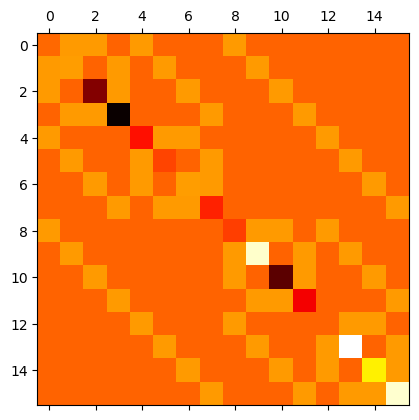

In [6]:
def create_hamiltonian_matrix(n_qubits, graph, weights, bias):

    full_matrix = np.zeros((2 ** n_qubits, 2 ** n_qubits))

    # Creates the interaction component of the Hamiltonian
    for i, edge in enumerate(graph.edges):
        interaction_term = 1
        for qubit in range(0, n_qubits):
            if qubit in edge:
                interaction_term = np.kron(interaction_term, qml.matrix(qml.PauliZ)(0))
            else:
                interaction_term = np.kron(interaction_term, np.identity(2))
        full_matrix += weights[i] * interaction_term

    # Creates the bias components of the matrix
    for i in range(0, n_qubits):
        z_term = x_term = 1
        for j in range(0, n_qubits):
            if j == i:
                z_term = np.kron(z_term, qml.matrix(qml.PauliZ)(0))
                x_term = np.kron(x_term, qml.matrix(qml.PauliX)(0))
            else:
                z_term = np.kron(z_term, np.identity(2))
                x_term = np.kron(x_term, np.identity(2))
        full_matrix += bias[i] * z_term + x_term

    return full_matrix


# Prints a visual representation of the Hamiltonian matrix
ham_matrix = create_hamiltonian_matrix(qubit_number, ising_graph, target_weights, target_bias)
plt.matshow(ham_matrix, cmap="hot")
plt.show()

Preparing Quantum Data
======================


The collection of quantum data needed to run the QGRNN has two components: (i) copies of a low-energy state, and (ii) a collection of time-evolved states, each of which are simply the low-energy state evolved to different times. The following is a low-energy state of the target Hamiltonian:


In [7]:
low_energy_state = [
    (-0.054661080280306085 + 0.016713907320174026j),
    (0.12290003656489545 - 0.03758500591109822j),
    (0.3649337966440005 - 0.11158863596657455j),
    (-0.8205175732627094 + 0.25093231967092877j),
    (0.010369790825776609 - 0.0031706387262686003j),
    (-0.02331544978544721 + 0.007129899300113728j),
    (-0.06923183949694546 + 0.0211684344103713j),
    (0.15566094863283836 - 0.04760201916285508j),
    (0.014520590919500158 - 0.004441887836078486j),
    (-0.032648113364535575 + 0.009988590222879195j),
    (-0.09694382811137187 + 0.02965579457620536j),
    (0.21796861485652747 - 0.06668776658411019j),
    (-0.0027547112135013247 + 0.0008426289322652901j),
    (0.006193695872468649 - 0.0018948418969390599j),
    (0.018391279795405405 - 0.005625722994009138j),
    (-0.041350974715649635 + 0.012650711602265649j),
]

This state can be obtained by using a decoupled version of the "Variational Quantum Eigensolver" algorithm (VQE). Essentially, we choose a VQE ansatz such that the circuit cannot learn the exact ground state, but it can get fairly close. Another way to arrive at the same result is to perform VQE with a reasonable ansatz, but to terminate the algorithm before it converges to the ground state. If we used the exact ground state $|\psi_0\rangle$, the time-dependence would be trivial and the data would not provide enough information about the Hamiltonian parameters.

We can verify that this is a low-energy state by numerically finding the lowest eigenvalue of the Hamiltonian and comparing it to the energy expectation of this low-energy state:


In [8]:
res = np.vdot(low_energy_state, (ham_matrix @ low_energy_state))
energy_exp = np.real_if_close(res)
print(f"Energy Expectation: {energy_exp}")


ground_state_energy = np.real_if_close(min(np.linalg.eig(ham_matrix)[0]))
print(f"Ground State Energy: {ground_state_energy}")

Energy Expectation: -7.244508985189114
Ground State Energy: -7.330689661291245


We have in fact found a low-energy, non-ground state, as the energy expectation is slightly greater than the energy of the true ground state. This, however, is only half of the information we need. We also require a collection of time-evolved, low-energy states. Evolving the low-energy state forward in time is fairly straightforward: all we have to do is multiply the initial state by a time-evolution unitary. This operation can be defined as a custom gate in PennyLane:


In [9]:
def state_evolve(hamiltonian, qubits, time):

    U = scipy.linalg.expm(-1j * hamiltonian * time)
    qml.QubitUnitary(U, wires=qubits)

We don\'t actually generate time-evolved quantum data quite yet, but we now have all the pieces required for its preparation.


Learning the Hamiltonian
========================


With the quantum data defined, we are able to construct the QGRNN and learn the target Hamiltonian. Each of the exponentiated Hamiltonians in the QGRNN ansatz, $\hat{H}^{j}_{\text{Ising}}(\boldsymbol\mu)$, are the $ZZ$, $Z$, and $X$ terms from the Ising Hamiltonian. This gives:


In [10]:
def qgrnn_layer(weights, bias, qubits, graph, trotter_step):

    # Applies a layer of RZZ gates (based on a graph)
    for i, edge in enumerate(graph.edges):
        qml.MultiRZ(2 * weights[i] * trotter_step, wires=(edge[0], edge[1]))

    # Applies a layer of RZ gates
    for i, qubit in enumerate(qubits):
        qml.RZ(2 * bias[i] * trotter_step, wires=qubit)

    # Applies a layer of RX gates
    for qubit in qubits:
        qml.RX(2 * trotter_step, wires=qubit)

As was mentioned in the first section, the QGRNN has two registers. In one register, some piece of quantum data $|\psi(t)\rangle$ is prepared and in the other we have $U_{H}(\boldsymbol\mu, \ \Delta) |\psi_0\rangle$. We need a way to measure the similarity between these states. This can be done by using the fidelity, which is simply the modulus squared of the inner product
between the states, $| \langle \psi(t) | U_{H}(\Delta, \ \boldsymbol\mu) |\psi_0\rangle |^2$. To calculate this value, we use a [SWAP test](https://en.wikipedia.org/wiki/Swap_test) between the registers:


In [11]:
def swap_test(control, register1, register2):

    qml.Hadamard(wires=control)
    for reg1_qubit, reg2_qubit in zip(register1, register2):
        qml.CSWAP(wires=(control, reg1_qubit, reg2_qubit))
    qml.Hadamard(wires=control)

After performing this procedure, the value returned from a measurement of the circuit is $\langle Z \rangle$, with respect to the `control` qubit. The probability of measuring the $|0\rangle$ state in this
control qubit is related to both the fidelity between registers and $\langle Z \rangle$. Thus, with a bit of algebra, we find that $\langle Z \rangle$ is equal to the fidelity.

Before creating the full QGRNN and the cost function, we define a few more fixed values. Among these is a \"guessed\" interaction graph, which we set to be a [complete graph](https://en.wikipedia.org/wiki/Complete_graph). This choice is motivated by the fact that any target interaction graph will be a subgraph of this initial guess. Part of the idea behind the QGRNN is
that we don't know the interaction graph, and it has to be learned. In this case, the graph is learned *automatically* as the target parameters are optimized. The $\boldsymbol\mu$ parameters that correspond to edges that don\'t exist in the target graph will simply approach $0$.


Edges: [(4, 5), (4, 6), (4, 7), (5, 6), (5, 7), (6, 7)]


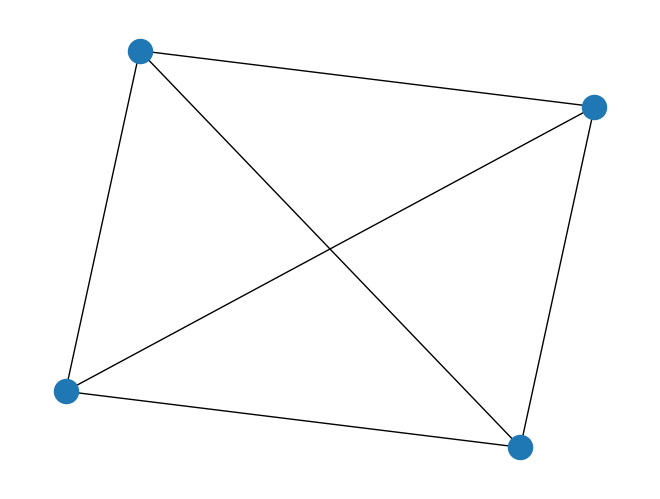

In [12]:
# Defines some fixed values

reg1 = tuple(range(qubit_number))  # First qubit register
reg2 = tuple(range(qubit_number, 2 * qubit_number))  # Second qubit register

control = 2 * qubit_number  # Index of control qubit
trotter_step = 0.01  # Trotter step size

# Defines the interaction graph for the new qubit system

new_ising_graph = nx.complete_graph(reg2)

print(f"Edges: {new_ising_graph.edges}")
nx.draw(new_ising_graph)

With this done, we implement the QGRNN circuit for some given time value:


In [13]:
def qgrnn(weights, bias, time=None):

    # Prepares the low energy state in the two registers
    qml.StatePrep(np.kron(low_energy_state, low_energy_state), wires=reg1 + reg2)

    # Evolves the first qubit register with the time-evolution circuit to
    # prepare a piece of quantum data
    state_evolve(ham_matrix, reg1, time)

    # Applies the QGRNN layers to the second qubit register
    depth = time / trotter_step  # P = t/Delta
    for _ in range(0, int(depth)):
        qgrnn_layer(weights, bias, reg2, new_ising_graph, trotter_step)

    # Applies the SWAP test between the registers
    swap_test(control, reg1, reg2)

    # Returns the results of the SWAP test
    return qml.expval(qml.PauliZ(control))

We have the full QGRNN circuit, but we still need to define a cost function. We know that $| \langle \psi(t) | U_{H}(\boldsymbol\mu, \ \Delta) |\psi_0\rangle |^2$ approaches $1$ as the states become more similar and approaches $0$ as the states become orthogonal. Thus, we choose to minimize the quantity $-| \langle \psi(t) | U_{H}(\boldsymbol\mu, \ \Delta) |\psi_0\rangle |^2$.
Since we are interested in calculating this value for many different pieces of quantum data, the final cost function is the average negative fidelity\* between registers:

$$\mathcal{L}(\boldsymbol\mu, \ \Delta) \ = \ - \frac{1}{N} \displaystyle\sum_{i \ = \ 1}^{N} |
\langle \psi(t_i) | \ U_{H}(\boldsymbol\mu, \ \Delta) \ |\psi_0\rangle |^2,$$

where we use $N$ pieces of quantum data.

Before creating the cost function, we must define a few more fixed variables:


In [14]:
N = 15  # The number of pieces of quantum data that are used for each step
max_time = 0.1  # The maximum value of time that can be used for quantum data

We then define the negative fidelity cost function:


In [15]:
rng = np.random.default_rng(seed=42)

def cost_function(weight_params, bias_params):

    # Randomly samples times at which the QGRNN runs
    times_sampled = rng.random(size=N) * max_time

    # Cycles through each of the sampled times and calculates the cost
    total_cost = 0
    for dt in times_sampled:
        result = qgrnn_qnode(weight_params, bias_params, time=dt)
        total_cost += -1 * result

    return total_cost / N

Next we set up for optimization. Here we will use the qiskit's AER simulator (`qiskit.aer` from the PennyLane-Qiskit plugin). Users with access to the IBM Q Experience can swap `qiskit.aer` for `qiskit.ibmq` and specify their chosen backend (see [here](https://docs.pennylane.ai/projects/qiskit/en/latest/devices/ibmq.html)).


In [16]:
# Defines the new device
qgrnn_dev = qml.device("qiskit.aer", wires=2 * qubit_number + 1)

# Defines the new QNode
qgrnn_qnode = qml.QNode(qgrnn, qgrnn_dev)

steps = 300

optimizer = qml.AdamOptimizer(stepsize=0.5)

weights = rng.random(size=len(new_ising_graph.edges), requires_grad=True) - 0.5
bias = rng.random(size=qubit_number, requires_grad=True) - 0.5

initial_weights = copy.copy(weights)
initial_bias = copy.copy(bias)

All that remains is executing the optimization loop.


In [17]:
for i in range(0, steps):
    (weights, bias), cost = optimizer.step_and_cost(cost_function, weights, bias)

    # Prints the value of the cost function
    if i % 5 == 0:
        print(f"Cost at Step {i}: {cost}")
        print(f"Weights at Step {i}: {weights}")
        print(f"Bias at Step {i}: {bias}")
        print("---------------------------------------------")

Cost at Step 0: -0.9803638573791904
Weights at Step 0: [-0.22603613  0.43887001  0.85859236  0.69735898  0.09417125 -0.02437147]
Bias at Step 0: [-0.23884748 -0.21392016  0.12809368  0.45037793]
---------------------------------------------
Cost at Step 5: -0.9974589524428035
Weights at Step 5: [-0.75106068  1.078707    0.83766935  1.9741555   0.04982793 -0.06747815]
Bias at Step 5: [-0.50836435 -1.32708118  1.57468372  0.11442806]
---------------------------------------------
Cost at Step 10: -0.9971878268304798
Weights at Step 10: [ 0.01577799  0.48771566  0.68379977  1.75747002 -0.21948418 -0.00484698]
Bias at Step 10: [ 0.22007905 -0.90282076  1.58989008 -0.1051542 ]
---------------------------------------------
Cost at Step 15: -0.9981871533122741
Weights at Step 15: [-0.06744249  0.65720464  1.31471457  1.47430241  0.05813038 -0.41315658]
Bias at Step 15: [-0.29045223 -0.67045595  1.19395446  0.24677711]
---------------------------------------------
Cost at Step 20: -0.9995130692

With the learned parameters, we construct a visual representation of the Hamiltonian to which they correspond and compare it to the target Hamiltonian, and the initial guessed Hamiltonian:


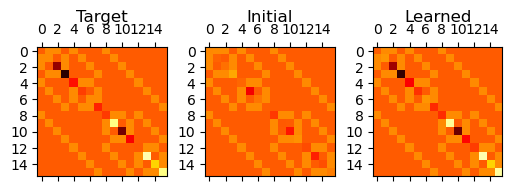

In [18]:
new_ham_matrix = create_hamiltonian_matrix(
    qubit_number, nx.complete_graph(qubit_number), weights, bias
)

init_ham = create_hamiltonian_matrix(
    qubit_number, nx.complete_graph(qubit_number), initial_weights, initial_bias
)

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(6, 6))

axes[0].matshow(ham_matrix, vmin=-7, vmax=7, cmap="hot")
axes[0].set_title("Target", y=1.13)

axes[1].matshow(init_ham, vmin=-7, vmax=7, cmap="hot")
axes[1].set_title("Initial", y=1.13)

axes[2].matshow(new_ham_matrix, vmin=-7, vmax=7, cmap="hot")
axes[2].set_title("Learned", y=1.13)

plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.show()

These images look very similar, indicating that the QGRNN has done a good job learning the target Hamiltonian.

We can also look at the exact values of the target and learned parameters. Recall how the target interaction graph has $4$ edges while the complete graph has $6$. Thus, as the QGRNN converges to the optimal solution, the weights corresponding to edges $(1, 3)$ and $(2, 0)$ in the complete graph should go to $0$, as this indicates that they have no
effect, and effectively do not exist in the learned Hamiltonian.


In [19]:
# We first pick out the weights of edges (1, 3) and (2, 0)
# and then remove them from the list of target parameters

weights_noedge = []
weights_edge = []
for ii, edge in enumerate(new_ising_graph.edges):
    if (edge[0] - qubit_number, edge[1] - qubit_number) in ising_graph.edges:
        weights_edge.append(weights[ii])
    else:
        weights_noedge.append(weights[ii])

Then, we print all of the weights:


In [20]:
print("Target parameters     Learned parameters")
print("Weights")
print("-" * 41)
for ii_target, ii_learned in zip(target_weights, weights_edge):
    print(f"{ii_target : <20}|{ii_learned : >20}")

print("\nBias")
print("-"*41)
for ii_target, ii_learned in zip(target_bias, bias):
    print(f"{ii_target : <20}|{ii_learned : >20}")

print(f"\nNon-Existing Edge Parameters: {[val.unwrap() for val in weights_noedge]}")

Target parameters     Learned parameters
Weights
-----------------------------------------
0.56                |  0.5988034096092858
1.24                |   1.348386551200527
1.67                |  1.7862070648455795
-0.79               |   -0.84254755061592

Bias
-----------------------------------------
-1.44               | -1.4067983643944109
-1.43               | -1.3529638627173834
1.18                |  1.0349129419830845
-0.93               | -1.0635874966599668

Non-Existing Edge Parameters: [-0.0012651471928194283, -0.0036534472423273715]


The weights of edges $(1, 3)$ and $(2, 0)$ are very close to $0$, indicating we have learned the cycle graph from the complete graph. In addition, the remaining learned weights are fairly close to those of the target Hamiltonian. Thus, the QGRNN is functioning properly, and has learned the target Ising Hamiltonian to a high degree of accuracy!


# References

1. Ville Bergholm et al. PennyLane: Automatic differentiation of hybrid quantum-classical computations. 2018. [arXiv:1811.04968](https://arxiv.org/abs/1811.04968)
2.  Verdon, G., McCourt, T., Luzhnica, E., Singh, V., Leichenauer, S., &
    Hidary, J. (2019). Quantum Graph Neural Networks. arXiv preprint
    [arXiv:1909.12264](https://arxiv.org/abs/1909.12264).
